# 🦺 PPE Detection using YOLOv8
Roboflow에서 제공하는 PPE 데이터셋을 기반으로 YOLOv8 모델을 학습하고, 개인 보호구 착용 여부를 감지합니다.

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
from google.colab import files
uploaded = files.upload()  # 여기서 PPE.v2i.yolov8.zip 파일 업로드

Saving PPE.v2i.yolov8.zip to PPE.v2i.yolov8.zip


In [4]:
import zipfile
with zipfile.ZipFile("PPE.v2i.yolov8.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/PPE.v2i.yolov8")

In [5]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
model.train(
    data="/content/PPE.v2i.yolov8/data.yaml",
    epochs=30,
    imgsz=640,
    batch=16
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 111MB/s]


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/PPE.v2i.yolov8/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 755k/755k [00:00<00:00, 20.9MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 95.5MB/s]


AMP: checks passed ✅


train: Scanning /content/PPE.v2i.yolov8/train/labels... 1126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1126/1126 [00:00<00:00, 2374.06it/s]

train: WARNING ⚠️ /content/PPE.v2i.yolov8/train/images/Video2_167_jpg.rf.ecac3a2bd007ef8b995c3da9a574c55f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/PPE.v2i.yolov8/train/images/Video2_167_jpg.rf.f51c1db34bc3315314a8d3dbb3bd8e8d.jpg: 1 duplicate labels removed
train: New cache created: /content/PPE.v2i.yolov8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/PPE.v2i.yolov8/valid/labels... 326 images, 0 backgrounds, 0 corrupt: 100%|██████████| 326/326 [00:00<00:00, 1535.96it/s]

val: New cache created: /content/PPE.v2i.yolov8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.12G      1.189       2.34      1.344         59        640: 100%|██████████| 71/71 [00:21<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.30it/s]


                   all        326       1514      0.904        0.4      0.804      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       2.6G      1.073      1.232      1.239         36        640: 100%|██████████| 71/71 [00:19<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.74it/s]

                   all        326       1514      0.829      0.786      0.868       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.62G       1.05      1.106      1.208         31        640: 100%|██████████| 71/71 [00:19<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.75it/s]

                   all        326       1514      0.871       0.81      0.888      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.64G      0.981      1.017      1.167         44        640: 100%|██████████| 71/71 [00:19<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.97it/s]

                   all        326       1514      0.896      0.795      0.897      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.65G     0.9814     0.9687      1.157        107        640: 100%|██████████| 71/71 [00:18<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.03it/s]

                   all        326       1514      0.878      0.859       0.92      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.67G     0.9467     0.9188      1.154         47        640: 100%|██████████| 71/71 [00:18<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.21it/s]

                   all        326       1514      0.898      0.868       0.94      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.69G     0.9324     0.8361      1.128         47        640: 100%|██████████| 71/71 [00:19<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.83it/s]

                   all        326       1514      0.917      0.861       0.94      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.71G     0.9201     0.8343      1.135         63        640: 100%|██████████| 71/71 [00:19<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.04it/s]

                   all        326       1514      0.917      0.846      0.934      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.72G     0.8848     0.7794      1.102         28        640: 100%|██████████| 71/71 [00:18<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.01it/s]


                   all        326       1514      0.935      0.846      0.937      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.74G     0.8814     0.7601      1.106         28        640: 100%|██████████| 71/71 [00:18<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.19it/s]

                   all        326       1514      0.934      0.892      0.956       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.76G     0.8677     0.7111      1.091         25        640: 100%|██████████| 71/71 [00:19<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.12it/s]

                   all        326       1514      0.941      0.866      0.949      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.77G     0.8451     0.6898      1.084         34        640: 100%|██████████| 71/71 [00:18<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.51it/s]

                   all        326       1514      0.939      0.889      0.956      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.79G     0.8306     0.6652      1.076         26        640: 100%|██████████| 71/71 [00:18<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.39it/s]


                   all        326       1514      0.932      0.889      0.955      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.81G     0.8291     0.6597       1.07         30        640: 100%|██████████| 71/71 [00:18<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.07it/s]

                   all        326       1514      0.931      0.886      0.953      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.82G     0.8145     0.6233      1.065         40        640: 100%|██████████| 71/71 [00:19<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.02it/s]

                   all        326       1514      0.915      0.909      0.958      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.84G     0.8158     0.6169      1.063         29        640: 100%|██████████| 71/71 [00:18<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.51it/s]

                   all        326       1514      0.935      0.905      0.963      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.86G     0.7948     0.6023      1.053         34        640: 100%|██████████| 71/71 [00:18<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.56it/s]

                   all        326       1514      0.932      0.909      0.962      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.88G     0.7951     0.5915      1.049         43        640: 100%|██████████| 71/71 [00:18<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.98it/s]

                   all        326       1514       0.94      0.912      0.967      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.89G     0.7901     0.5832      1.051         66        640: 100%|██████████| 71/71 [00:19<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.07it/s]

                   all        326       1514      0.944      0.909      0.967      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.91G     0.7816     0.5777      1.045         44        640: 100%|██████████| 71/71 [00:18<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.03it/s]

                   all        326       1514      0.929      0.926      0.968      0.753


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.92G     0.7592     0.5504      1.036         22        640: 100%|██████████| 71/71 [00:19<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.25it/s]

                   all        326       1514      0.925      0.925       0.97      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.95G     0.7509     0.5149      1.026         18        640: 100%|██████████| 71/71 [00:17<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.29it/s]

                   all        326       1514      0.944      0.926      0.969      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.96G     0.7352     0.4942       1.02         26        640: 100%|██████████| 71/71 [00:18<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.09it/s]

                   all        326       1514      0.949      0.921      0.971      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.98G     0.7306     0.4829       1.02         23        640: 100%|██████████| 71/71 [00:17<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.88it/s]

                   all        326       1514      0.954      0.923      0.974      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.99G      0.715     0.4722     0.9998         29        640: 100%|██████████| 71/71 [00:17<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.17it/s]

                   all        326       1514       0.95      0.925      0.974       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.01G     0.6985     0.4598     0.9918         51        640: 100%|██████████| 71/71 [00:18<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.78it/s]

                   all        326       1514      0.957      0.919      0.972      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.03G     0.6898     0.4461     0.9875         14        640: 100%|██████████| 71/71 [00:17<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.03it/s]

                   all        326       1514      0.953      0.924      0.976      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.04G     0.6788      0.437     0.9826         32        640: 100%|██████████| 71/71 [00:18<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.24it/s]

                   all        326       1514      0.955      0.931      0.976      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.06G     0.6787     0.4346     0.9864         19        640: 100%|██████████| 71/71 [00:17<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]

                   all        326       1514      0.955      0.934      0.977      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.08G     0.6713     0.4287     0.9727         37        640: 100%|██████████| 71/71 [00:17<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.31it/s]

                   all        326       1514      0.943      0.945      0.978      0.784



30 epochs completed in 0.185 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


                   all        326       1514      0.943      0.945      0.978      0.784
                 Boots        246        541      0.963      0.917      0.976       0.72
                Helmet        232        273      0.946      0.967      0.977      0.729
                Person        246        302      0.893      0.927      0.971      0.865
                  Vest        307        398      0.969       0.97      0.989      0.821
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 4, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f927b44c4d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [7]:
import os

image_dir = "/content/PPE.v2i.yolov8/test/images"
image_list = os.listdir(image_dir)

# 앞에 5개만 출력
for img in image_list[:5]:
    print(img)


00173_jpg.rf.5238399593b62e9c5555fc0f9552ba8b.jpg
image_165_jpg.rf.7986cb005760a3709934400406d5e6ff.jpg
Video2_179_jpg.rf.f8452dba672fcba0002215d1a0bce5bd.jpg
image_215_jpg.rf.38a7e38bf077906c5d25ebae80a7b909.jpg
Video2_11_jpg.rf.63a90171408852e00f10b929f2de89bd.jpg


In [14]:
results = model.predict(
    source="/content/PPE.v2i.yolov8/test/images/Video2_179_jpg.rf.f8452dba672fcba0002215d1a0bce5bd.jpg",
    conf=0.3,
    save=True,
    name="predict_result"  # 🔥 결과 저장 폴더 고정
)



image 1/1 /content/PPE.v2i.yolov8/test/images/Video2_179_jpg.rf.f8452dba672fcba0002215d1a0bce5bd.jpg: 640x640 2 Bootss, 1 Helmet, 1 Person, 1 Vest, 10.2ms
Speed: 2.4ms preprocess, 10.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict_result


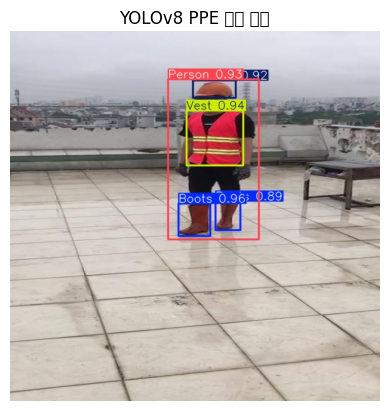

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# 예측했던 이미지 파일 이름만 따서 저장된 이름 구성
image_filename = "Video2_179_jpg.rf.f8452dba672fcba0002215d1a0bce5bd.jpg"
predicted_path = f"/content/runs/detect/predict_result/{image_filename}"

# 이미지 열기 및 시각화
img = Image.open(predicted_path)
plt.imshow(img)
plt.axis('off')
plt.title("YOLOv8 PPE 예측 결과")
plt.show()


In [11]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')
files.download('/content/runs/detect/train/results.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>